In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from itertools import combinations
from collections import Counter

# Merging 12 months data into one single file

In [2]:
a = listdir("./Sales_Data")
print(a)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
all_files = [f"./Sales_Data/{f}" for f in listdir("./Sales_Data") if isfile(join("./Sales_Data", f))]
all_files_with_path = [f"./Sales_Data/{f}" for f in all_files ]
print(all_files)

['./Sales_Data/Sales_April_2019.csv', './Sales_Data/Sales_August_2019.csv', './Sales_Data/Sales_December_2019.csv', './Sales_Data/Sales_February_2019.csv', './Sales_Data/Sales_January_2019.csv', './Sales_Data/Sales_July_2019.csv', './Sales_Data/Sales_June_2019.csv', './Sales_Data/Sales_March_2019.csv', './Sales_Data/Sales_May_2019.csv', './Sales_Data/Sales_November_2019.csv', './Sales_Data/Sales_October_2019.csv', './Sales_Data/Sales_September_2019.csv']


In [4]:
# merging multiple csv files 
all_data = pd.concat( 
    map(pd.read_csv, all_files), ignore_index=True) 

print(all_data.shape)
all_data.head()




(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning Data

### Drop rows of NaN 

In [5]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [6]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Converting quantity ordered and price to numeric value

In [7]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Adding New colums

# Add a month column

In [8]:
all_data["Month"] = all_data["Order Date"].str[0:2].astype("int8")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# What was the best month in sales?? How much was in sales??

### Add a Sales Column

In [9]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a new city column

In [10]:
def get_city(address):
    city = address.split(",")[-2]
    state = address.split(" ")[-2]
    return city + ", " + state

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [11]:
results = all_data.groupby(["Month"]).sum()
print(type(results))

<class 'pandas.core.frame.DataFrame'>


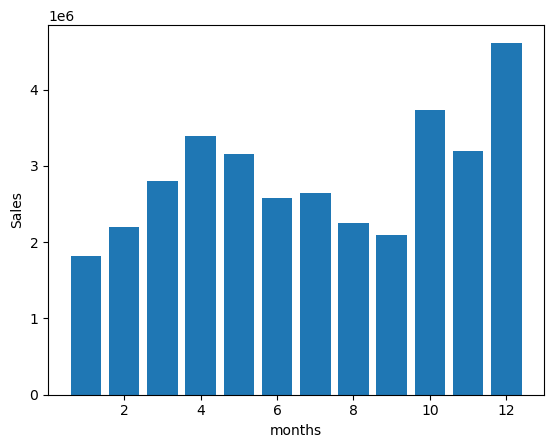

In [12]:
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xlabel("months")
plt.ylabel("Sales")
plt.show()

### What city had the most number of sales??

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [14]:
city_results = all_data.groupby("City").sum()
city_results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
"Atlanta, GA",1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
"Austin, TX",1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
"Boston, MA",1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
"Dallas, TX",1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
"Los Angeles, CA",1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80


In [15]:
cities = [city for city,df in all_data.groupby("City")]
print(cities)

[' Atlanta, GA', ' Austin, TX', ' Boston, MA', ' Dallas, TX', ' Los Angeles, CA', ' New York City, NY', ' Portland, ME', ' Portland, OR', ' San Francisco, CA', ' Seattle, WA']


[' Atlanta, GA', ' Austin, TX', ' Boston, MA', ' Dallas, TX', ' Los Angeles, CA', ' New York City, NY', ' Portland, ME', ' Portland, OR', ' San Francisco, CA', ' Seattle, WA']


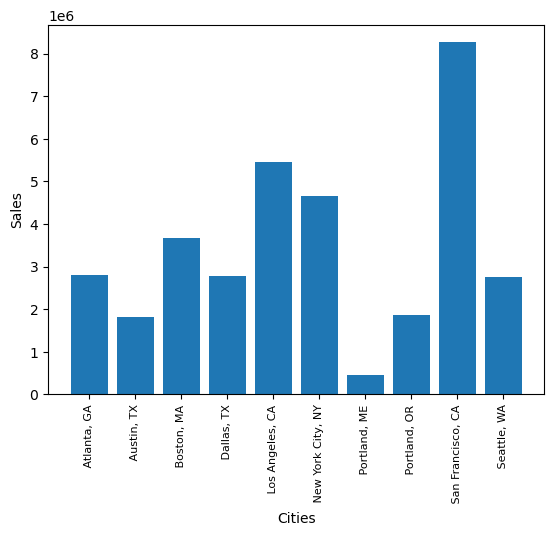

In [16]:
cities = [city for city,df in all_data.groupby("City")]
print(cities)
plt.bar(cities, city_results["Sales"])
plt.xticks(cities,  rotation = "vertical", size = 8)
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.show()

### What time should we advertise??

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [18]:
def get_hour(date_hour):
    time = date_hour.split(" ")[1][0:2]
    return time

all_data["Hours"] = all_data["Order Date"].apply(lambda x: get_hour(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",09


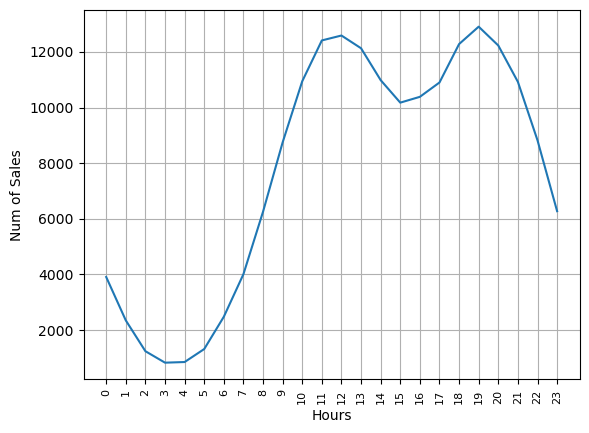

In [19]:
hours_results = all_data.groupby("Hours").count()
hours_results.head()
plt.plot(range(0,24), hours_results["Sales"])
plt.grid()
plt.xticks(range(0,24),  rotation = "vertical", size = 8)
plt.xlabel("Hours")
plt.ylabel("Num of Sales")
plt.show()


### What products are most often sold togather??

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",09


In [21]:
togather_sold_df = all_data[all_data["Order ID"].duplicated(keep = False)]
togather_sold_df["Grouped"] = togather_sold_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
togather_sold_df.head()

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_9692\3993119977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  togather_sold_df["Grouped"] = togather_sold_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [37]:
togather_sold_df = togather_sold_df.drop_duplicates(subset = ["Order ID", "Grouped"])
togather_sold_df.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,"New York City, NY",11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,"Seattle, WA",10,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,Bose SoundSport Headphones,1,99.99,04/24/19 17:15,"659 Lincoln St, New York City, NY 10001",4,99.99,"New York City, NY",17,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,34in Ultrawide Monitor,1,379.99,04/05/19 17:38,"730 6th St, Austin, TX 73301",4,379.99,"Austin, TX",17,"34in Ultrawide Monitor,Google Phone"
225,176774,Lightning Charging Cable,1,14.95,04/25/19 15:06,"372 Church St, Los Angeles, CA 90001",4,14.95,"Los Angeles, CA",15,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,iPhone,1,700.00,04/03/19 07:37,"976 Hickory St, Dallas, TX 75001",4,700.00,"Dallas, TX",07,"iPhone,Lightning Charging Cable"


In [62]:
count = Counter()
for val in togather_sold_df["Grouped"]:
    val_split = val.split(",")
    count.update(Counter(combinations(val_split,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [107]:
highest_togather_sold_x_axis_val = [str(key) for key, val in highest_togather_sold]
highest_togather_sold_x_axis_val

["('iPhone', 'Lightning Charging Cable')",
 "('Google Phone', 'USB-C Charging Cable')",
 "('iPhone', 'Wired Headphones')",
 "('Google Phone', 'Wired Headphones')",
 "('Vareebadd Phone', 'USB-C Charging Cable')",
 "('iPhone', 'Apple Airpods Headphones')",
 "('Google Phone', 'Bose SoundSport Headphones')",
 "('USB-C Charging Cable', 'Wired Headphones')",
 "('Vareebadd Phone', 'Wired Headphones')",
 "('Lightning Charging Cable', 'Wired Headphones')"]

In [85]:
a = "a"
b = ." "join(a)
print(b)

SyntaxError: invalid syntax (1624754248.py, line 2)

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


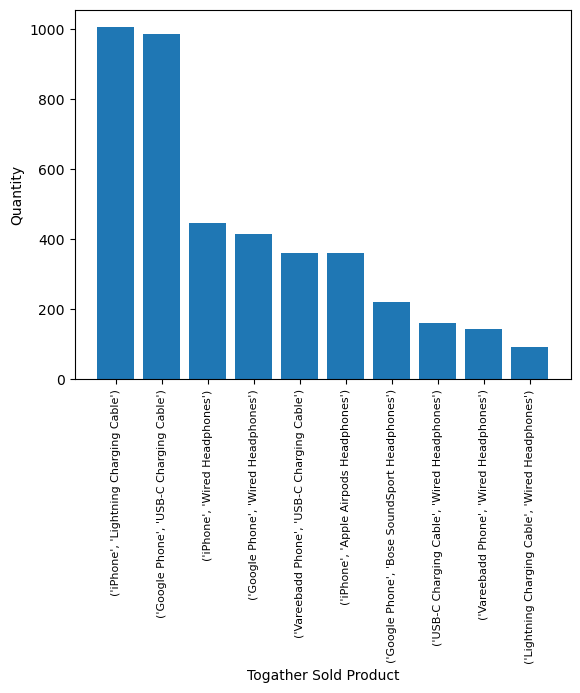

In [115]:
sorted_list = list(sorted(count.items(), key=lambda x: x[1], reverse=True))
highest_togather_sold = sorted_list[:10]
print(highest_togather_sold)
highest_togather_sold_x_axis_val = [str(key) for key, val in highest_togather_sold]
highest_togather_sold_y_axis_val = [i[1] for i in highest_togather_sold]
plt.bar(highest_togather_sold_x_axis_val, highest_togather_sold_y_axis_val)
plt.xticks(highest_togather_sold_x_axis_val,  rotation = "vertical", size = 8)
plt.xlabel("Togather Sold Product")
plt.ylabel("Quantity")
plt.show()

### What product sold the most and why??

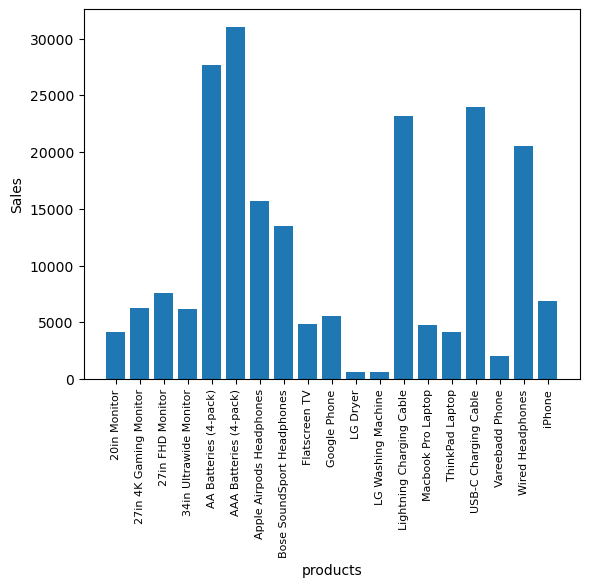

In [24]:
product_sales = all_data.groupby("Product").sum()
products = [product for product, df in all_data.groupby("Product")]
plt.bar(products, product_sales["Quantity Ordered"])
plt.xticks(products,  rotation = "vertical", size = 8)
plt.xlabel("products")
plt.ylabel("Sales")
plt.show()

In [34]:
prices = all_data.groupby("Product")
prices["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_9692\3424433296.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,  rotation = "vertical", size = 8)


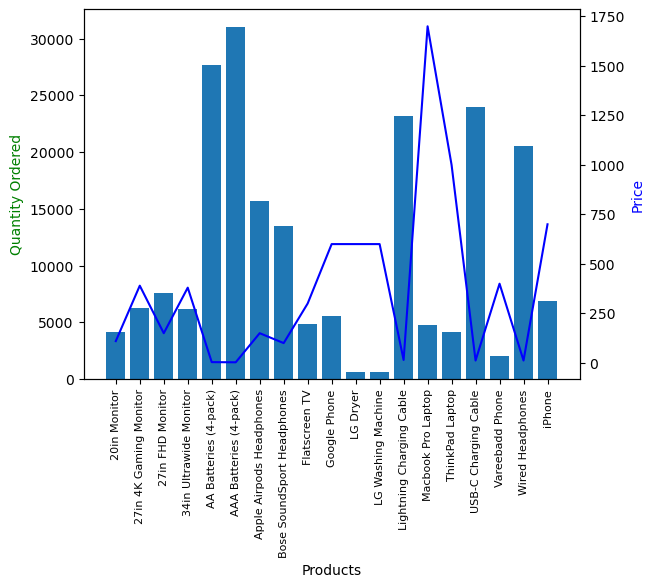

In [35]:
prices = all_data.groupby("Product")["Price Each"].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_sales["Quantity Ordered"])
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products,  rotation = "vertical", size = 8)

plt.show()